In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import PFSMG as pfsmg
import functions as func
import pickle
from quadprog import solve_qp

In [2]:
SEED_arr = [112233455, 666, 889099, 558866, 559966, 99998866, 99888866, 9966668, 99677808, 7542229,  \
            11234455, 6600451, 8852099, 110036, 277066, 277066, 900186, 9820816, 908253, 1089532]
num_data = range(1000, 6001, 500)

## Two objectives: gender (Binary-valued sensitive attribute) vs loss

In [52]:
data_idx = 8
prob = func.Fairness_LogRe_DI_binary('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG(prob)

## key parameters
run.point_per_iteration = 2 
run.num_steps_per_point = 3 
run.stepsize = 2.1 
run.step_scheme = 3
run.alpha = 1.0/3 
run.discount_iter_interval = 80 
run.batch1_init = 80 
run.batch1_factor = 1.005 
run.batch1_max = 1 
run.batch2_init = 80  
run.batch2_factor = 1.005 
run.batch2_max = 1.0/2  

## other parameters
run.num_starting_pts = 5
run.percent_explore = 0.4 
run.f1_explore_interval = 15 
run.f2_explore_interval = 1000 

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f1_num_steps_per_point = 3*run.num_steps_per_point 
run.f2_num_steps_per_point = 2*run.num_steps_per_point 

run.num_max_hole_points = 5 
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration 
run.max_hole_num_steps_per_point = run.num_steps_per_point 
run.max_hole_only = False 
run.dense_threshold = 0 # 1.0/(800 + self.num_iter/2.0)

#Training data size:  5000
split 1
idx [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
sum of sensitive 3386.0


In [29]:
print SEED_arr[data_idx], num_data[data_idx]


99677808 5000


In [15]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()


time:  0.158140897751
#Pts:  4  #Iter:  3
time:  0.0834732055664
#Pts:  11  #Iter:  6
time:  0.181900978088
#Pts:  13  #Iter:  9
time:  0.183878898621
#Pts:  20  #Iter:  12
time:  0.255713939667
#Pts:  18  #Iter:  15
time:  0.461755990982
#Pts:  14  #Iter:  18
time:  0.208720207214
#Pts:  20  #Iter:  21
time:  0.259147167206
#Pts:  25  #Iter:  24
time:  0.298126220703
#Pts:  32  #Iter:  27
time:  0.36477804184
#Pts:  37  #Iter:  30
time:  0.792161941528
#Pts:  35  #Iter:  33
time:  0.370802879333
#Pts:  38  #Iter:  36
time:  0.397796869278
#Pts:  41  #Iter:  39
time:  0.422699928284
#Pts:  42  #Iter:  42
time:  0.427870035172
#Pts:  40  #Iter:  45
time:  0.845143079758
#Pts:  27  #Iter:  48
time:  0.325935840607
#Pts:  35  #Iter:  51
time:  0.382972002029
#Pts:  45  #Iter:  54
time:  0.462917089462
#Pts:  47  #Iter:  57
time:  0.467314004898
#Pts:  51  #Iter:  60
time:  1.08466005325
#Pts:  55  #Iter:  63
time:  0.60427904129
#Pts:  62  #Iter:  66
time:  0.603128910065
#Pts:  53  #Iter

time:  9.58842897415
#Pts:  829  #Iter:  555
time:  9.600222826
#Pts:  812  #Iter:  558
time:  9.89275693893
#Pts:  794  #Iter:  561
time:  9.87280797958
#Pts:  803  #Iter:  564
time:  10.2773988247
#Pts:  810  #Iter:  567
time:  10.2254331112
#Pts:  807  #Iter:  570
time:  10.4417231083
#Pts:  818  #Iter:  573
time:  10.2864129543
#Pts:  836  #Iter:  576
time:  10.4617450237
#Pts:  869  #Iter:  579
time:  11.2594561577
#Pts:  868  #Iter:  582
time:  11.2721281052
#Pts:  867  #Iter:  585
time:  11.5097551346
#Pts:  846  #Iter:  588
time:  10.5889611244
#Pts:  843  #Iter:  591
time:  10.863697052
#Pts:  845  #Iter:  594
time:  10.7420940399
#Pts:  844  #Iter:  597
time:  10.6471161842
#Pts:  847  #Iter:  600
time:  11.1805791855
#Pts:  875  #Iter:  603
time:  11.9079499245
#Pts:  890  #Iter:  606
time:  11.0365319252
#Pts:  922  #Iter:  609
time:  11.6520252228
#Pts:  901  #Iter:  612
time:  11.3879330158
#Pts:  895  #Iter:  615
time:  11.4103081226
#Pts:  921  #Iter:  618
time:  11.855

In [17]:
## dump data into log file
logfile = "pickle/gender_vs_loss/gender_seed%s_num_data%s.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], open(logfile,"wb"))

Using testing data to do plot

In [16]:
prob = func.Fairness_LogRe_DI_binary('data/Adult_income_gender_reduced.txt', 'Adult_income_gender', 1, \
                                     SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG(prob)

# clear dominated points according to testing dataset
f1_arrays7 = prob.loss(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f1_arrays7, f2_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, point_arrays7)
print "# Pareto points after cleanning up: ", len(f1_arrays7)

# Testing data size:  40222
split 1
idx [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
sum of sensitive 27141.0
# Pareto points after cleanning up:  225


In [9]:
def remove_pts(list_f1, list_f2, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_pts[list_f1_idx]

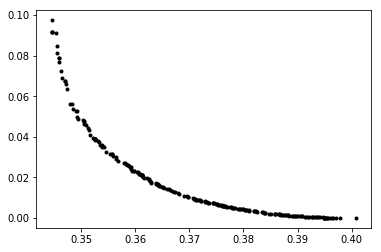

In [18]:
## if necessary, remove extreme points that are far away from Pareto front
# f1_arrays7, f2_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, point_arrays7, 2)
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [19]:
## pick a number of points from Pareto front and compute accuracy, TPR, FPR, D.I., etc. 
M = min(1500, len(f1_arrays7)) 
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


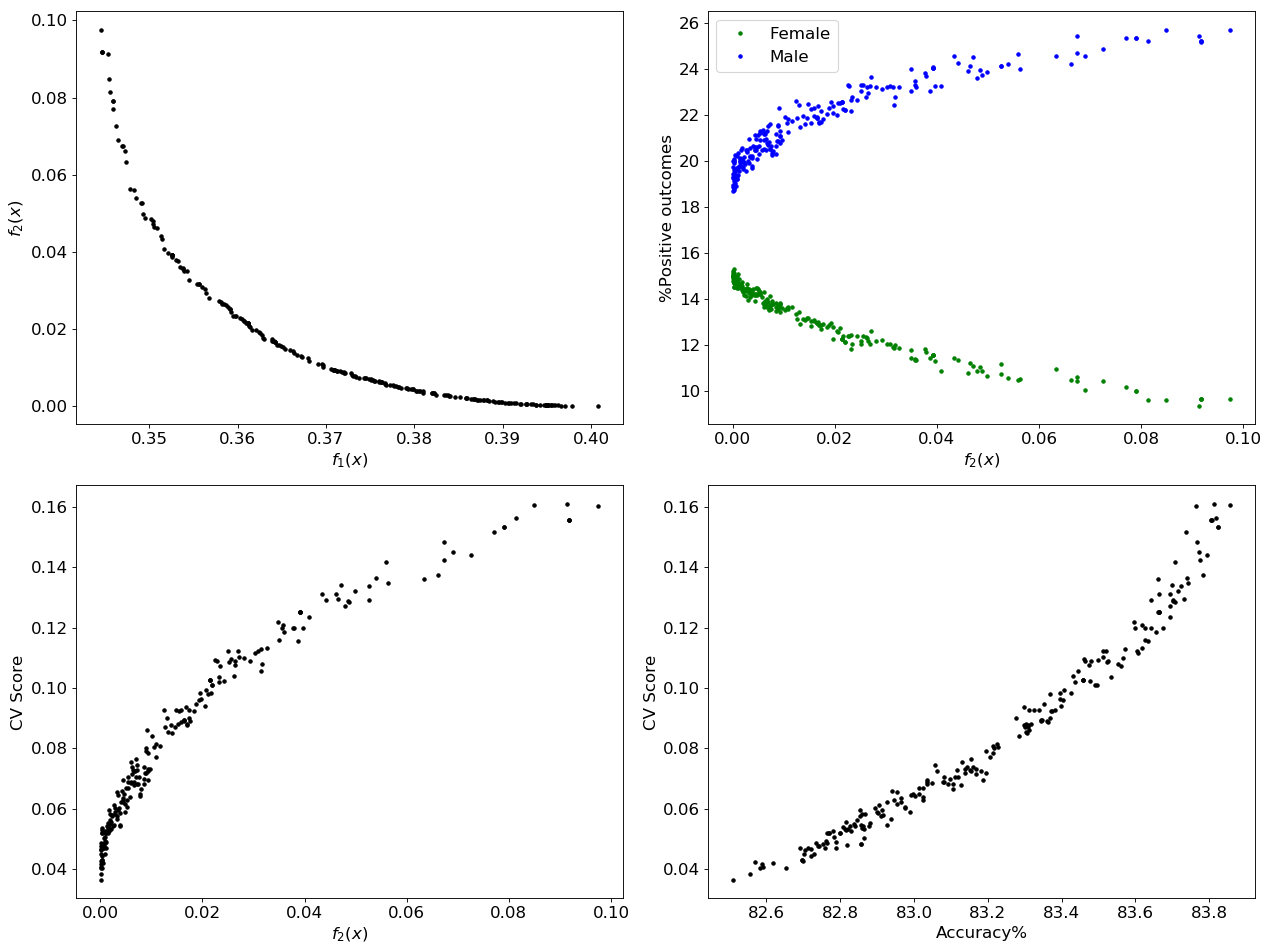

In [20]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_2(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0]*100.0, 'g.', lw=2, label = 'Female')
ax2.plot(training_obj2, percentage[:, 1]*100.0, 'b.', lw=2, label = 'Male')
ax2.set_xlabel('$f_2(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize=15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_2(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()


## Two objectives: race (multi-valued sensitive attribute) vs loss

In [53]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi_smoothed('data/Adult_income_race_reduced_smg.txt', 'Adult_income_race', range(50, 55), SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG(prob)

run.max_len_pareto_front = 1500
## key parameters
run.point_per_iteration = 3
run.num_steps_per_point = 2
run.stepsize = 2.6 
run.step_scheme = 3
run.alpha = 1.0/3
run.discount_iter_interval = 100

run.batch1_init = 80 # 50 
run.batch1_factor = 1.005
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.005
run.batch2_max = 1.0/2 

## other parameters
run.num_starting_pts = 5 #20
run.percent_explore = 0.4
run.f1_explore_interval = 10 
run.f2_explore_interval = 40 

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 2 #1 
run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = 2*run.num_steps_per_point #run.num_steps_per_point

run.num_max_hole_points = 10
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 1.0/1300 #1.0/1000 # 0 indicates 1.0/(self.num_iter/2 + 1000)


#Training data size:  5000
Sensitive feature index:  [50, 51, 52, 53, 54]
Mean of sensitive values:  [0.008  0.0288 0.0944 0.0058 0.863 ]


In [28]:
x = np.random.uniform(prob.lb, prob.ub, [2, prob.n])
print prob.f1(x)

[2.29968358 5.86538279]


In [29]:
print SEED_arr[data_idx], num_data[data_idx]


99677808 5000


In [ ]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.295390129089
#Pts:  4  #Iter:  2
time:  0.166576147079
#Pts:  8  #Iter:  4
time:  0.294381856918
#Pts:  21  #Iter:  6
time:  0.689368009567
#Pts:  33  #Iter:  8
time:  0.795278072357
#Pts:  36  #Iter:  10
time:  1.18225502968
#Pts:  31  #Iter:  12
time:  0.873224973679
#Pts:  33  #Iter:  14
time:  0.912633180618
#Pts:  44  #Iter:  16
time:  1.05117797852
#Pts:  50  #Iter:  18
time:  1.12886691093
#Pts:  41  #Iter:  20
time:  1.33483719826
#Pts:  48  #Iter:  22
time:  1.23467898369
#Pts:  61  #Iter:  24
time:  1.40682411194
#Pts:  61  #Iter:  26
time:  1.41163897514
#Pts:  52  #Iter:  28
time:  1.27475714684
#Pts:  72  #Iter:  30
time:  2.03552603722
#Pts:  71  #Iter:  32
time:  1.58754491806
#Pts:  67  #Iter:  34
time:  1.51774692535
#Pts:  77  #Iter:  36
time:  1.58656191826
#Pts:  81  #Iter:  38
time:  1.67268395424
#Pts:  84  #Iter:  40
time:  3.83580613136
#Pts:  86  #Iter:  42
time:  1.91784000397
#Pts:  92  #Iter:  44
time:  1.93363809586
#Pts:  87  #Iter:  46
time:  1.9

time:  10.1067261696
#Pts:  426  #Iter:  372
time:  7.94989299774
#Pts:  387  #Iter:  374
time:  7.23802089691
#Pts:  356  #Iter:  376
time:  6.58029603958
#Pts:  377  #Iter:  378
time:  7.0359890461
#Pts:  352  #Iter:  380
time:  10.0258889198
#Pts:  436  #Iter:  382
time:  8.0410990715
#Pts:  424  #Iter:  384
time:  7.91510009766
#Pts:  384  #Iter:  386
time:  7.2919960022
#Pts:  403  #Iter:  388
time:  7.59699296951
#Pts:  378  #Iter:  390
time:  10.8319618702
#Pts:  469  #Iter:  392
time:  8.63733410835
#Pts:  422  #Iter:  394
time:  8.23207402229
#Pts:  389  #Iter:  396
time:  7.53995585442
#Pts:  399  #Iter:  398
time:  7.68410491943
#Pts:  398  #Iter:  400
time:  18.3099770546
#Pts:  701  #Iter:  402
time:  13.0441870689
#Pts:  512  #Iter:  404
time:  10.6741120815
#Pts:  473  #Iter:  406
time:  9.37679481506
#Pts:  411  #Iter:  408
time:  8.44791603088
#Pts:  432  #Iter:  410
time:  10.1179120541
#Pts:  417  #Iter:  412
time:  7.73790407181
#Pts:  417  #Iter:  414
time:  7.9150

724


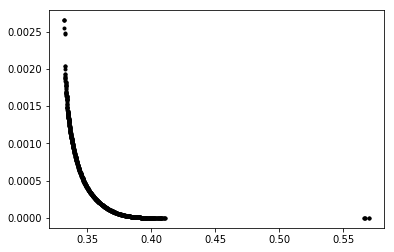

In [31]:
print len(f1_arrays7)
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [32]:
## dump data into log file
logfile = "pickle/race_vs_loss/smoothed/Race_seed%s_num_data%s_4(f1explore=f2explore)_gap1300.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7, point_arrays7], open(logfile,"wb"))

In [42]:
data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_iter7, f1_arrays7, f2_arrays7, point_arrays7 = pickle.load(open(logfile,"rb"))

Using testing data to do plot

In [35]:
prob = func.Fairness_LogRe_DI_multi('data/Adult_income_race_reduced_smg.txt', 'Adult_income_race', range(50, 55), SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG(prob)
# clear dominated points according to testing data
f1_arrays7 = prob.loss(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f1_arrays7, f2_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, point_arrays7)
print "# Pareto points after cleanning up: ", len(f1_arrays7)

# Testing data size:  40222
Sensitive feature index:  [50, 51, 52, 53, 54]
Mean of sensitive values:  [0.0098205  0.02881508 0.09338173 0.00805529 0.8599274 ]
# Pareto points after cleanning up:  133


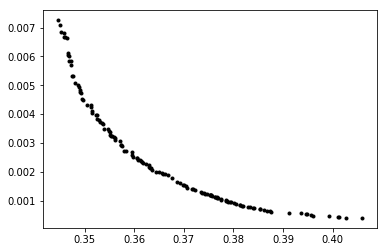

In [36]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()


In [37]:
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


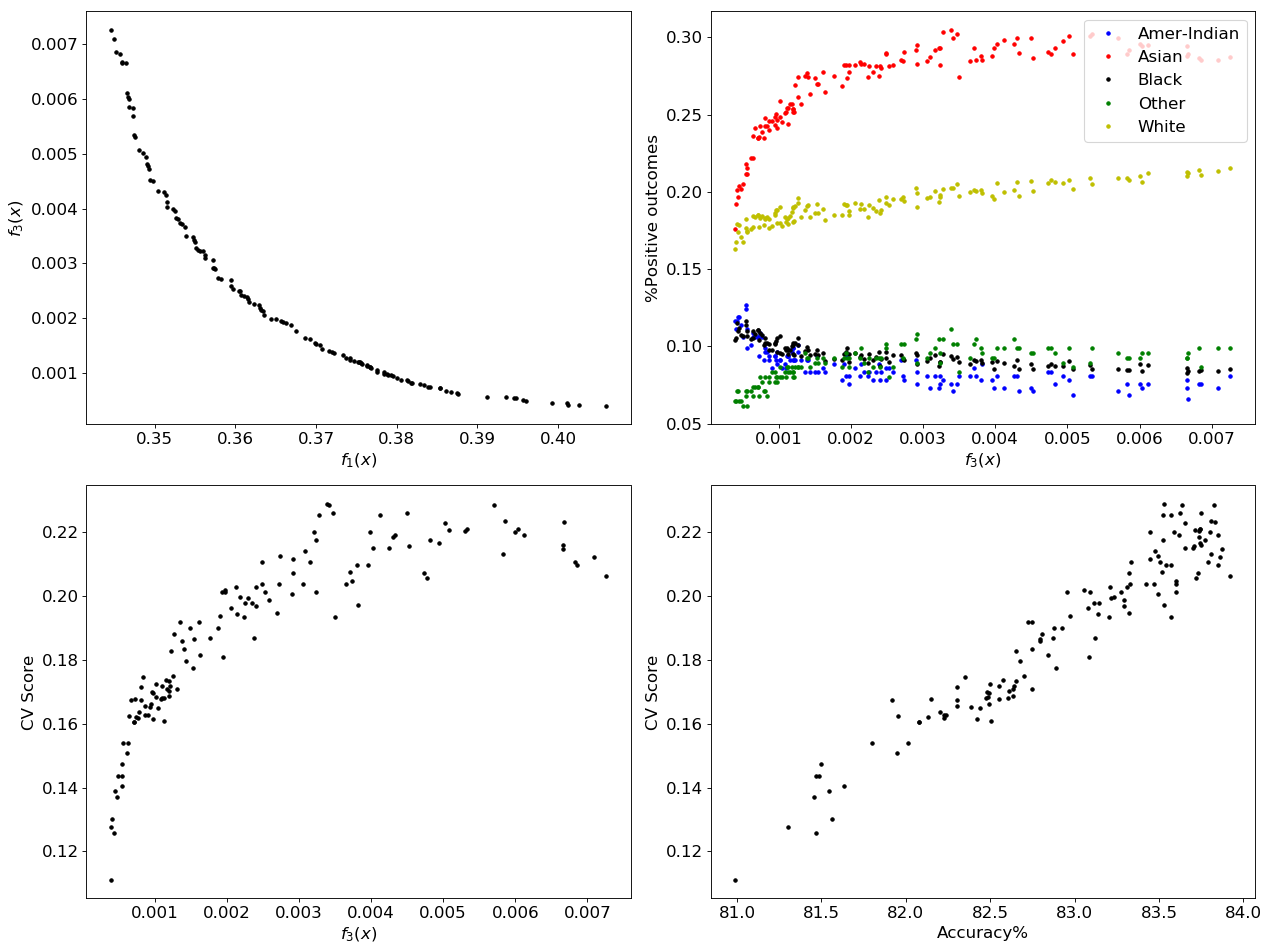

In [38]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_3(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0],'b.', lw=2, label = 'Amer-Indian')
ax2.plot(training_obj2, percentage[:, 1],'r.', lw=2, label = 'Asian')
ax2.plot(training_obj2, percentage[:, 2],'k.', lw=2, label = 'Black')
ax2.plot(training_obj2, percentage[:, 3],'g.', lw=2, label = 'Other')
ax2.plot(training_obj2, percentage[:, 4],'y.', lw=2, label = 'White')
ax2.set_xlabel('$f_3(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize = 15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_3(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()

In [49]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi('data/Adult_income_race_reduced_smg.txt', 'Adult_income_race', range(50, 55), SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG(prob)

# clear dominated points according to testing data
f1_arrays7 = prob.loss(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f1_arrays7, f2_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, point_arrays7)
print "# Pareto points after cleanning up: ", len(f1_arrays7)

# Testing data size:  40222
Sensitive feature index:  [50, 51, 52, 53, 54]
Mean of sensitive values:  [0.0098205  0.02881508 0.09338173 0.00805529 0.8599274 ]
# Pareto points after cleanning up:  133


In [50]:
M = min(1500, len(f1_arrays7))
CV_Score, percentage, pvalue, total_accuracy, training_accuracy, training_FPR, training_FNR, \
training_loss, training_obj1, training_obj2 \
= prob.compute_accuracy(f1_arrays7, f2_arrays7, point_arrays7, M)


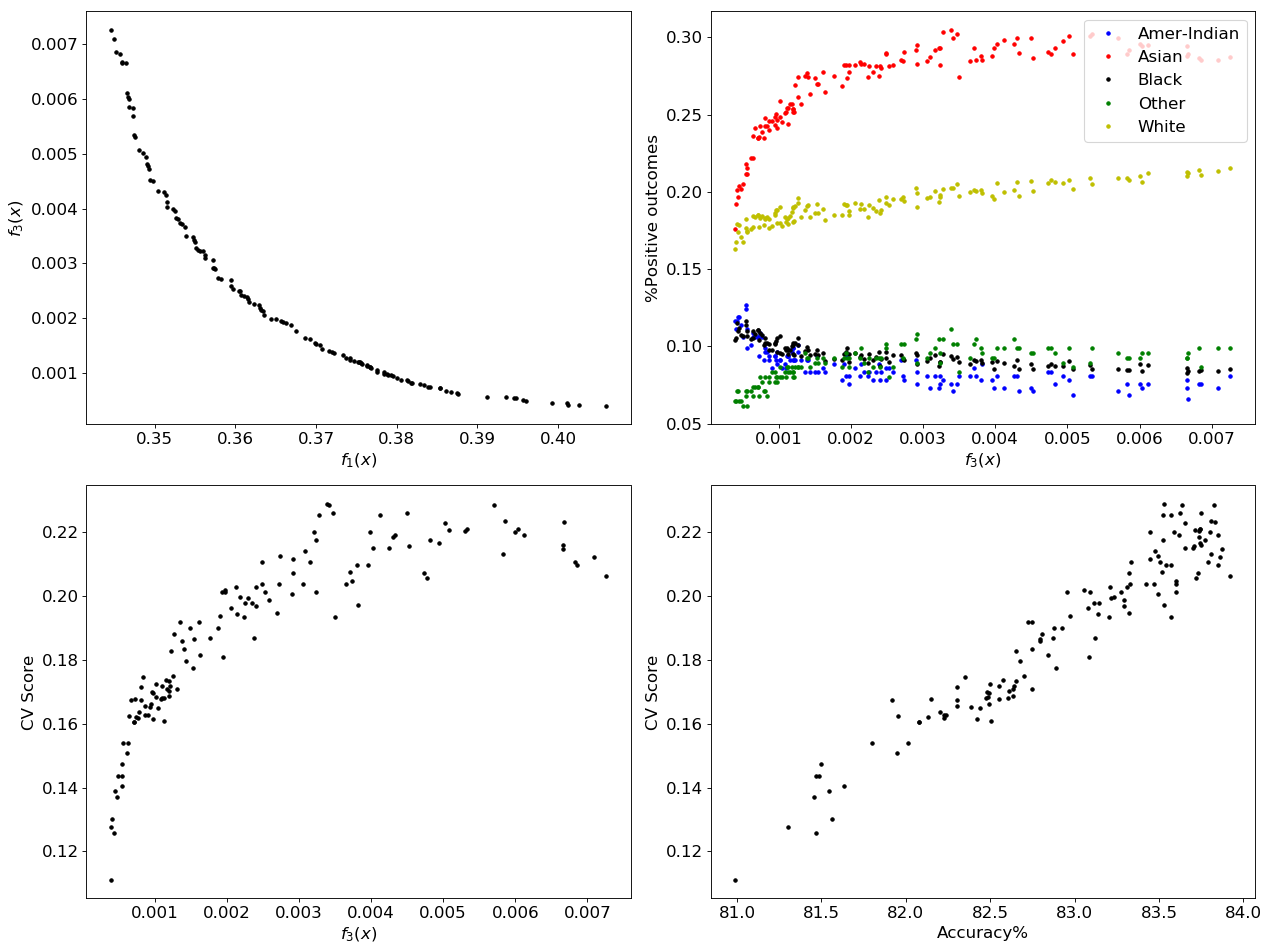

In [51]:
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 2, 1)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.plot(training_loss, training_obj2, 'k.', lw=2)
ax1.set_xlabel('$f_1(x)$', fontsize = 15)
ax1.set_ylabel('$f_3(x)$', fontsize = 15)

ax2 = plt.subplot(2, 2, 2)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.plot(training_obj2, percentage[:, 0],'b.', lw=2, label = 'Amer-Indian')
ax2.plot(training_obj2, percentage[:, 1],'r.', lw=2, label = 'Asian')
ax2.plot(training_obj2, percentage[:, 2],'k.', lw=2, label = 'Black')
ax2.plot(training_obj2, percentage[:, 3],'g.', lw=2, label = 'Other')
ax2.plot(training_obj2, percentage[:, 4],'y.', lw=2, label = 'White')
ax2.set_xlabel('$f_3(x)$', fontsize = 15)
ax2.set_ylabel('%Positive outcomes', fontsize = 15)
ax2.legend(fontsize = 15)

ax3= plt.subplot(2, 2, 3)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.plot(training_obj2, CV_Score, 'k.', lw=2)
ax3.set_xlabel('$f_3(x)$', fontsize=15)
ax3.set_ylabel('CV Score', fontsize=15)

ax4 = plt.subplot(2, 2, 4)
ax4.xaxis.set_tick_params(labelsize=15)
ax4.yaxis.set_tick_params(labelsize=15)
ax4.plot(total_accuracy*100.0, CV_Score, 'k.', lw=2)
ax4.set_xlabel('Accuracy%', fontsize=15)
ax4.set_ylabel('CV Score', fontsize=15)

plt.tight_layout()
plt.show()

## Two objectives: race vs gender

In [13]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi_gender_race('data/Adult_income_race&gender_reduced_smg.txt', 'Adult_income_race', range(50, 55), [55], SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG_m2(prob)

run.max_len_pareto_front = 1500
## key parameters
run.point_per_iteration = 3
run.num_steps_per_point = 2
run.stepsize = 2.6 
run.step_scheme = 3
run.alpha = 1.0/3
run.discount_iter_interval = 100

run.batch1_init = 80 
run.batch1_factor = 1.005
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.005
run.batch2_max = 1

## other parameters
run.num_starting_pts = 5 #20
run.percent_explore = 0.4
run.f1_explore_interval = 30 
run.f2_explore_interval = 30 

run.f1_explore_pt_per_iter = 1 
run.f2_explore_pt_per_iter = 1 

run.f1_num_steps_per_point = run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point

run.num_max_hole_points = 10
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 1.0/600 # 0 indicates 1.0/(self.num_iter/2 + 1000)

#Training data size:  5000
Sensitive feature index:  [50, 51, 52, 53, 54, 55]
Mean of sensitive values for 1st attribute:  [0.008  0.0288 0.0944 0.0058 0.863 ]
Mean of sensitive values for 2nd attribute:  0.6772


In [14]:
f1_arrays7, f2_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.177462100983
#Pts:  2  #Iter:  2
time:  0.0776979923248
#Pts:  2  #Iter:  4
time:  0.0703189373016
#Pts:  2  #Iter:  6
time:  0.073991060257
#Pts:  6  #Iter:  8
time:  0.180397033691
#Pts:  9  #Iter:  10
time:  0.273640155792
#Pts:  8  #Iter:  12
time:  0.253268003464
#Pts:  4  #Iter:  14
time:  0.132180929184
#Pts:  8  #Iter:  16
time:  0.237629890442
#Pts:  9  #Iter:  18
time:  0.263229846954
#Pts:  9  #Iter:  20
time:  0.257381916046
#Pts:  4  #Iter:  22
time:  0.131782054901
#Pts:  7  #Iter:  24
time:  0.229439020157
#Pts:  5  #Iter:  26
time:  0.158859014511
#Pts:  7  #Iter:  28
time:  0.209834098816
#Pts:  6  #Iter:  30
time:  0.199363946915
#Pts:  7  #Iter:  32
time:  0.196383953094
#Pts:  8  #Iter:  34
time:  0.234230041504
#Pts:  6  #Iter:  36
time:  0.178644895554
#Pts:  6  #Iter:  38
time:  0.190101861954
#Pts:  6  #Iter:  40
time:  0.173789024353
#Pts:  7  #Iter:  42
time:  0.215608119965
#Pts:  7  #Iter:  44
time:  0.202948093414
#Pts:  8  #Iter:  46
time:  0.2375

time:  0.474460124969
#Pts:  14  #Iter:  372
time:  0.417445898056
#Pts:  16  #Iter:  374
time:  0.472098112106
#Pts:  19  #Iter:  376
time:  0.570503950119
#Pts:  21  #Iter:  378
time:  0.581083059311
#Pts:  19  #Iter:  380
time:  0.571616888046
#Pts:  21  #Iter:  382
time:  0.564618825912
#Pts:  26  #Iter:  384
time:  0.692414999008
#Pts:  5  #Iter:  386
time:  0.16268992424
#Pts:  5  #Iter:  388
time:  0.162271022797
#Pts:  7  #Iter:  390
time:  0.255844116211
#Pts:  8  #Iter:  392
time:  0.266641139984
#Pts:  13  #Iter:  394
time:  0.392076969147
#Pts:  19  #Iter:  396
time:  0.56676197052
#Pts:  18  #Iter:  398
time:  0.540068149567
#Pts:  28  #Iter:  400
time:  0.714544057846
#Pts:  8  #Iter:  402
time:  0.249691009521
#Pts:  11  #Iter:  404
time:  0.338871002197
#Pts:  14  #Iter:  406
time:  0.421324968338
#Pts:  11  #Iter:  408
time:  0.333918094635
#Pts:  17  #Iter:  410
time:  0.515259027481
#Pts:  20  #Iter:  412
time:  0.6176841259
#Pts:  23  #Iter:  414
time:  0.6537399291

time:  0.674865007401
#Pts:  16  #Iter:  738
time:  0.776517152786
#Pts:  14  #Iter:  740
time:  0.68452000618
#Pts:  15  #Iter:  742
time:  0.72710108757
#Pts:  15  #Iter:  744
time:  0.723458051682
#Pts:  16  #Iter:  746
time:  0.788863897324
#Pts:  16  #Iter:  748
time:  0.783532142639
#Pts:  17  #Iter:  750
time:  0.817276000977
#Pts:  13  #Iter:  752
time:  0.65146613121
#Pts:  15  #Iter:  754
time:  0.7412109375
#Pts:  16  #Iter:  756
time:  0.788078069687
#Pts:  12  #Iter:  758
time:  0.608116865158
#Pts:  16  #Iter:  760
time:  0.811656951904
#Pts:  16  #Iter:  762
time:  0.799254894257
#Pts:  16  #Iter:  764
time:  0.812082052231
#Pts:  17  #Iter:  766
time:  0.870460987091
#Pts:  16  #Iter:  768
time:  0.815603017807
#Pts:  15  #Iter:  770
time:  0.782773971558
#Pts:  17  #Iter:  772
time:  0.886646986008
#Pts:  17  #Iter:  774
time:  0.899240970612
#Pts:  16  #Iter:  776
time:  0.85861492157
#Pts:  13  #Iter:  778
time:  0.732419013977
#Pts:  15  #Iter:  780
time:  0.8785619

In [15]:
## dump data into log file
## f1 is binary sensitive gender and f2 is multi-categorical sensitive race
logfile = "pickle/Race&genderOnly_seed%s_num_data%s_ps4.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_iter, f1_arrays7, \
             f2_arrays7,point_arrays7], open(logfile,"wb"))

In [17]:
logfile = "pickle/Race&genderOnly_seed%s_num_data%s_ps4.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
data_name, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_iter, f1_arrays7, \
f2_arrays7, point_arrays7 = pickle.load(open(logfile,"rb"))

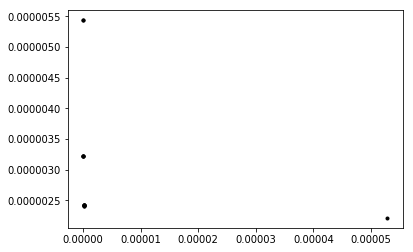

In [6]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

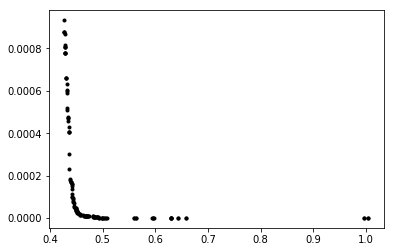

In [8]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

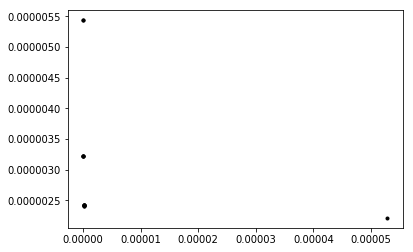

In [18]:
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

## Three objectives: race vs gender vs loss

In [59]:
data_idx = 8
prob = func.Fairness_LogRe_DI_multi_attributes('data/Adult_income_race&gender_reduced_smg.txt', 'Adult_income_race', range(50, 55), [55], SEED_arr[data_idx], num_data[data_idx], 'train')
run = pfsmg.Main_SMG_m3(prob)

run.max_len_pareto_front = 3000
## key parameters
run.point_per_iteration = 3
run.num_steps_per_point = 2
run.stepsize = 2.6 
run.step_scheme = 3
run.alpha = 1.0/3
run.discount_iter_interval = 100

run.batch1_init = 80 # 50 
run.batch1_factor = 1.005
run.batch1_max = 1
run.batch2_init = 80 
run.batch2_factor = 1.005
run.batch2_max = 1.0/2 
run.batch3_init = 80 
run.batch3_factor = 1.005
run.batch3_max = 1.0/2 

## other parameters
run.num_starting_pts = 5 #20
run.percent_explore = 0.4
run.f1_explore_interval = 10 
run.f2_explore_interval = 40 
run.f3_explore_interval = 50 #1000

run.f1_explore_pt_per_iter = 2 
run.f2_explore_pt_per_iter = 1 
run.f3_explore_pt_per_iter = 1 

run.f1_num_steps_per_point = 2*run.num_steps_per_point 
run.f2_num_steps_per_point = run.num_steps_per_point
run.f3_num_steps_per_point = run.num_steps_per_point

run.num_max_hole_points = 10
run.max_hole_explore_pt_per_iter = 2*run.point_per_iteration
run.max_hole_num_steps_per_point = run.num_steps_per_point
run.max_hole_only = False
run.dense_threshold = 1.0/1800 # 0 indicates 1.0/(self.num_iter/2 + 1000)

#Training data size:  5000
Sensitive feature index:  [50, 51, 52, 53, 54, 55]
Mean of sensitive values for 1st attribute:  [0.008  0.0288 0.0944 0.0058 0.863 ]
Mean of sensitive values for 2nd attribute:  0.6772


In [44]:
## f1: loss, f2: race, f3: gender
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, total_time_smg = run.main_SMG()

time:  0.357419013977
#Pts:  8  #Iter:  2
time:  0.387221813202
#Pts:  29  #Iter:  4
time:  1.16880989075
#Pts:  57  #Iter:  6
time:  1.91226005554
#Pts:  104  #Iter:  8
time:  2.99237799644
#Pts:  177  #Iter:  10
time:  7.07945990562
#Pts:  224  #Iter:  12
time:  6.10380601883
#Pts:  254  #Iter:  14
time:  6.48877692223
#Pts:  329  #Iter:  16
time:  8.37631082535
#Pts:  444  #Iter:  18
time:  11.4225420952
#Pts:  512  #Iter:  20
time:  22.2471940517
#Pts:  497  #Iter:  22
time:  13.0028390884
#Pts:  529  #Iter:  24
time:  14.0814988613
#Pts:  564  #Iter:  26
time:  14.0193850994
#Pts:  595  #Iter:  28
time:  15.3165249825
#Pts:  655  #Iter:  30
time:  24.5969829559
#Pts:  648  #Iter:  32
time:  17.3662009239
#Pts:  726  #Iter:  34
time:  17.7174959183
#Pts:  826  #Iter:  36
time:  20.8388741016
#Pts:  810  #Iter:  38
time:  20.4610431194
#Pts:  876  #Iter:  40
time:  40.2336249352
#Pts:  945  #Iter:  42
time:  24.0793499947
#Pts:  1034  #Iter:  44
time:  25.8726961613
#Pts:  983  #Ite

In [45]:
## dump data into log file
logfile = "pickle/three_obj/Race&gender_seed%s_num_data%s_3000_gap1800_f3explore50.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
pickle.dump([prob.data_name, total_time_smg, run.num_grad_eval_f1, \
             run.num_grad_eval_f2, run.num_grad_eval_f3, run.num_iter, f1_arrays7, \
             f2_arrays7, f3_arrays7, point_arrays7], open(logfile,"wb"))

In [70]:
logfile = "pickle/three_obj/Race&gender_seed%s_num_data%s_3000_gap1800_f3explore50.pickle"\
          %(SEED_arr[data_idx], num_data[data_idx])
data, total_time_smg, num_grad_eval_f1, num_grad_eval_f2, num_grad_eval_f3, \
num_iter7, f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 \
= pickle.load(open(logfile,"rb"))

3118


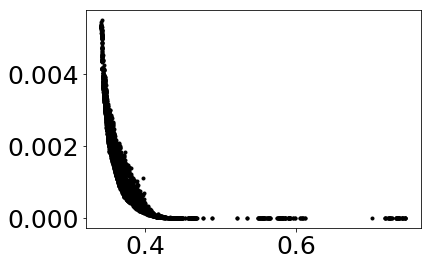

In [71]:
print len(f1_arrays7)
plt.plot(f1_arrays7, f2_arrays7, 'k.')
plt.show()

In [72]:
def remove_pts(list_f1, list_f2, list_f3, list_pts, num):
    list_f1_idx = np.argsort(list_f1)[:-num]
    return list_f1[list_f1_idx], list_f2[list_f1_idx], list_f3[list_f1_idx], list_pts[list_f1_idx]


In [73]:
plt.rc('font', **{'size':'25'})

In [96]:
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = remove_pts(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7, 20)

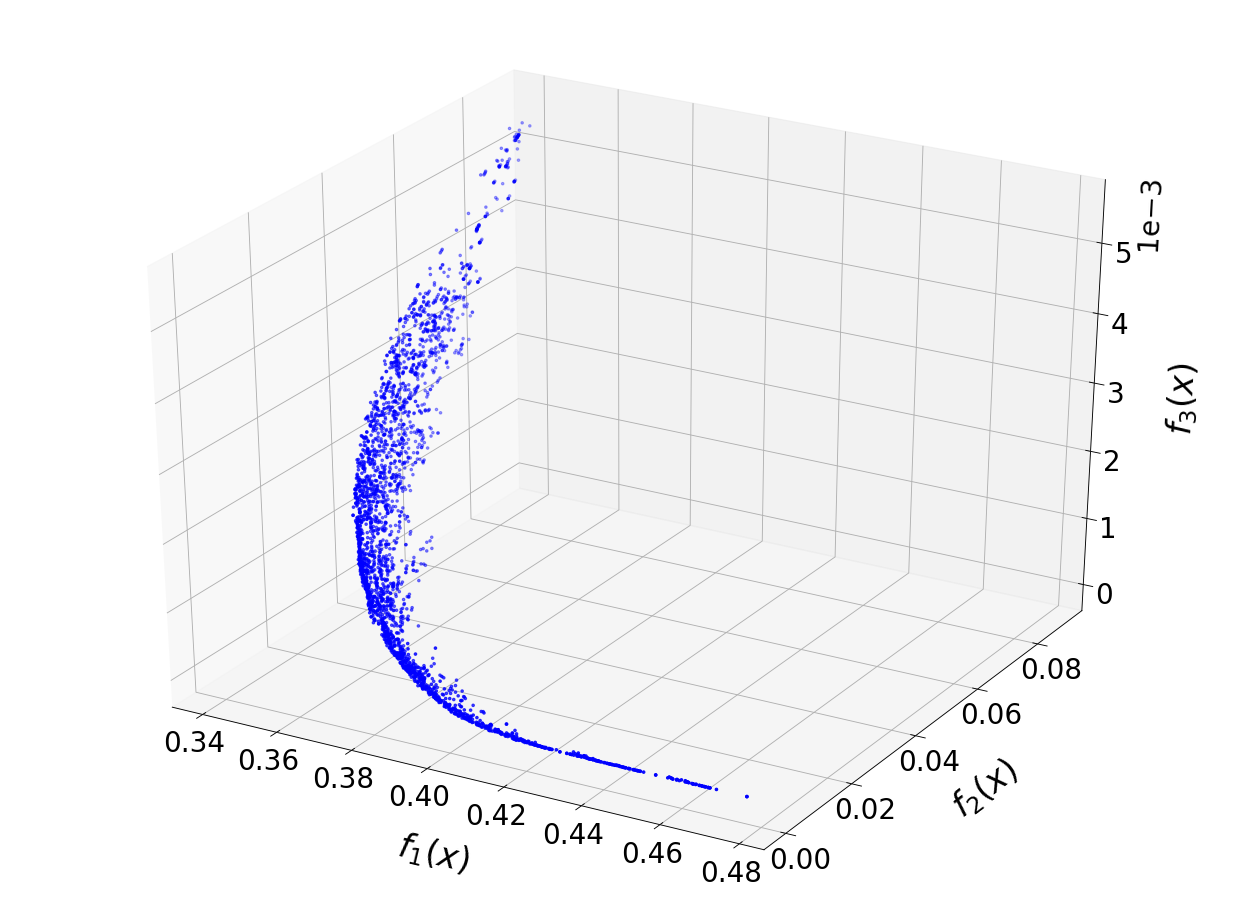

In [100]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.zaxis.set_tick_params(labelsize=25)

ax.set_xlabel('\n$f_1(x)$', fontsize = 30, linespacing=3)
ax.set_ylabel('\n$f_2(x)$', fontsize = 30, linespacing=3)
ax.set_zlabel('\n$f_3(x)$', fontsize = 30, linespacing=3)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

ax.scatter(f1_arrays7, f3_arrays7,f2_arrays7, c='b', marker='.')

plt.tight_layout()
plt.show()

figure_path = "figs/Adult_threeObj_gender_race.pdf"
fig.savefig(figure_path, bbox_inches='tight')

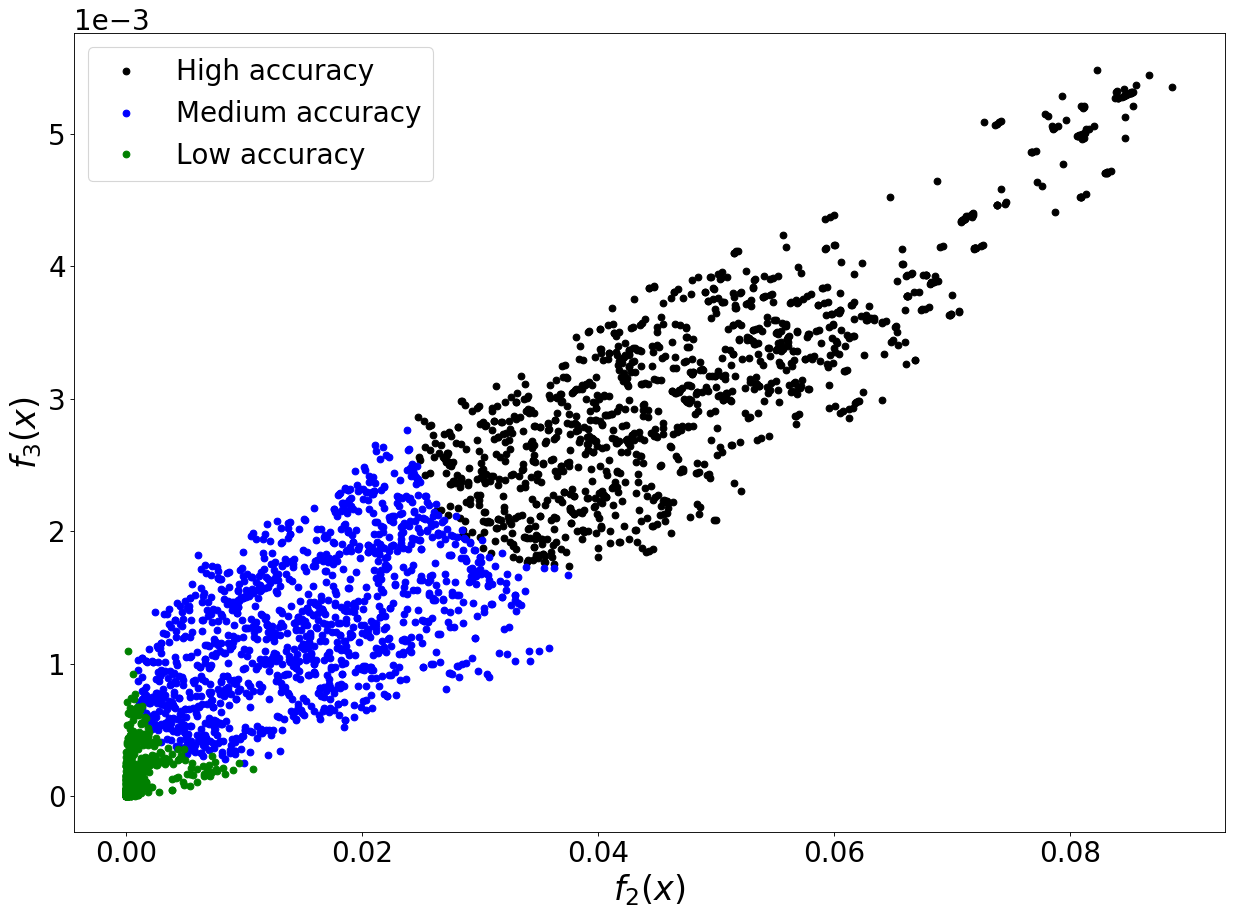

In [101]:
idx_red = np.where(f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7))
idx_blue = np.where((f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*1.0/10 + np.min(f1_arrays7)) \
                    & (f1_arrays7 < (np.max(f1_arrays7) - np.min(f1_arrays7))*3.5/10 + np.min(f1_arrays7)))
idx_green = np.where(f1_arrays7 >= (np.max(f1_arrays7) - np.min(f1_arrays7))*3.5/10 + np.min(f1_arrays7))


fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
# ax.plot(training_loss, training_obj2, 'k.', lw=2)
ax.plot(f3_arrays7[idx_red], f2_arrays7[idx_red],  'k.', label = 'High accuracy', markersize=12) #color=colors   higher accuracy
ax.plot(f3_arrays7[idx_blue], f2_arrays7[idx_blue],  'b.', label = 'Medium accuracy', markersize=12) #color=colors  middle accuracy
ax.plot(f3_arrays7[idx_green], f2_arrays7[idx_green],  'g.', label = 'Low accuracy', markersize=12) #color=colors lowest accuracy

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xlabel('$f_2(x)$', fontsize=30)
ax.set_ylabel('$f_3(x)$', fontsize=30)
ax.legend(fontsize = 25)


plt.tight_layout()
plt.show()

figure_path = "figs/Adult_threeObj_gender_race_2.pdf"
fig.savefig(figure_path, bbox_inches='tight')

In [55]:
prob = func.Fairness_LogRe_DI_multi_attributes('data/Adult_income_race&gender_reduced_smg.txt', 'Adult_income_race', \
                                               range(50, 55), [55], SEED_arr[data_idx], num_data[data_idx], 'test')
run = pfsmg.Main_SMG_m3(prob)


40222 45222
# Testing data size:  40222
Sensitive feature index:  [50, 51, 52, 53, 54, 55]
Mean of sensitive values for 1st attribute:  [0.0098205  0.02881508 0.09338173 0.00805529 0.8599274 ]
Mean of sensitive values for 2nd attribute:  0.6747799711600616


In [56]:
# clear dominated points according to testing data
f1_arrays7 = prob.f1(point_arrays7)
f2_arrays7 = prob.f2(point_arrays7)
f3_arrays7 = prob.f3(point_arrays7)
f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7 = run.clear(f1_arrays7, f2_arrays7, f3_arrays7, point_arrays7)
print "# Pareto points after cleanning up: ", len(f1_arrays7)

# Pareto points after cleanning up:  516


516


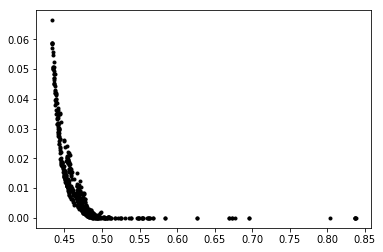

In [57]:
print len(f1_arrays7)
plt.plot(f1_arrays7, f3_arrays7, 'k.')
plt.show()

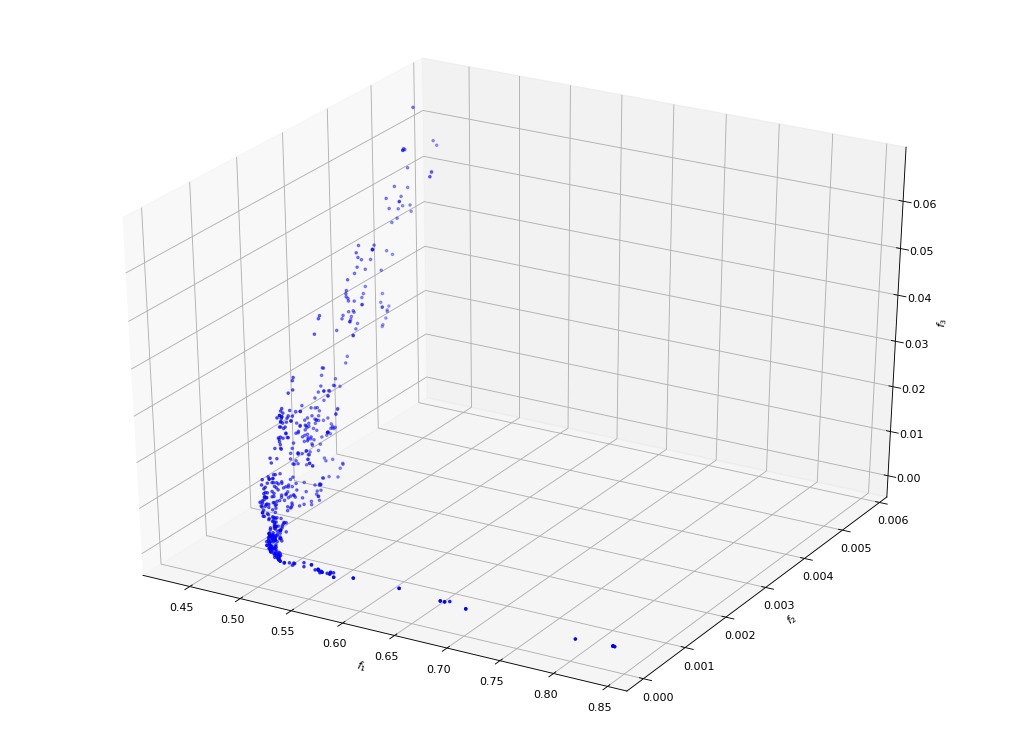

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1_arrays7,f2_arrays7,f3_arrays7, c='b', marker='.')

ax.set_xlabel('$f_1$')
ax.set_ylabel('$f_2$')
ax.set_zlabel('$f_3$')

plt.show()

In [ ]:
# clear dominated points at the end of each iteration
def clear2D(list_f1, list_f2, list_pt):

    x_bar = np.repeat(list_f1.reshape(-1,1),len(list_f1),axis = 1)
    y_bar = np.repeat(list_f2.reshape(-1,1),len(list_f2),axis = 1)

    array_f1 = list_f1
    array_f2 = list_f2
    array_pt = list_pt        

    x_check1 = (array_f1 <= x_bar)
    x_check2 = (array_f1 < x_bar)

    y_check1 = (array_f2 <= y_bar)
    y_check2 = (array_f2 < y_bar)

    all_check1 = (x_check1 & y_check2)
    all_check2 = (x_check2 & y_check1)

    sum1 = all_check1.sum(axis = 1)
    sum2 = all_check2.sum(axis = 1)

    rest_index = np.array([i for i in range(len(list_f1)) if (sum1[i] < 1 or sum2[i] < 1)])
    return array_f1[rest_index], array_f2[rest_index], array_pt[rest_index]

In [ ]:
 # clear dominated points at the end of each iteration
def clear(list_f1, list_f2, list_f3, list_pt):

    x_bar = np.repeat(list_f1.reshape(-1,1),len(list_f1),axis = 1)
    y_bar = np.repeat(list_f2.reshape(-1,1),len(list_f2),axis = 1)
    z_bar = np.repeat(list_f3.reshape(-1,1),len(list_f3),axis = 1)
    
    array_f1 = list_f1
    array_f2 = list_f2
    array_f3 = list_f3
    array_pt = list_pt        

    x_check1 = (array_f1 <= x_bar)
    x_check2 = (array_f1 < x_bar)

    y_check1 = (array_f2 <= y_bar)
    y_check2 = (array_f2 < y_bar)

    z_check1 = (array_f3 <= z_bar)
    z_check2 = (array_f3 < z_bar)
    
#     all_check1 = (x_check1 & y_check2)
#     print 
#     print all_check1.sum(axis = 1)
    
    all_check1 = (x_check1 & y_check1 & z_check2)
    all_check2 = (x_check1 & y_check2 & z_check1)
    all_check3 = (x_check2 & y_check1 & z_check1)
    
    all_check4 = (x_check1 & y_check2 & z_check2)
    all_check5 = (x_check2 & y_check2 & z_check1)
    all_check6 = (x_check2 & y_check1 & z_check2)
    
    print x_check2
    print y_check1
    print z_check1
    print all_check3

    sum1 = all_check1.sum(axis = 1)
    sum2 = all_check2.sum(axis = 1)
    sum3 = all_check3.sum(axis = 1)
    print sum1, sum2, sum3
    
    rest_index = np.array([i for i in range(len(list_f1)) if (sum1[i] < 1 or sum2[i] < 1 or sum3[i] < 1)])
    return array_f1[rest_index], array_f2[rest_index], array_f3[rest_index], array_pt[rest_index]

In [ ]:
list_f1 = np.array([1, 1, 0, 3, 5, -2, 3])
list_f2 = np.array([-1, 0, 3, -1, 4, 7, 0])
list_f3 = np.array([-1, 0, 4, 5, 2, -2, -3])
list_pt = np.zeros([7, 2])

In [ ]:
f1, f2, f3, pts = clear(list_f1, list_f2, list_f3, list_pt)